## 1. Importing Data & JSON File
## 2. Data Wrangling 
## 3. Extreme Values Check
## 4. Plotting Choropleth
## 5. Does the analysis answer any research questions 
## 6. Additional Insights

## Importing Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#define path
path = r'C:\Users\ajkap\Final Achievement'

In [4]:
# Import ".json" file for the World. 
world_geo = r'C:\Users\ajkap\Final Achievement\02 Data\Original Data\HHS6.geojson'

In [5]:
world_geo

'C:\\Users\\ajkap\\Final Achievement\\02 Data\\Original Data\\HHS6.geojson'

In [6]:
# Checking the JSON file contents:
f = open(r'C:\Users\ajkap\Final Achievement\02 Data\Original Data\HHS6.geojson') 

# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Northwest'}, 'geometry': {'coordinates': [[[-123.19735812715453, 49.05979668892013], [-123.58038789571361, 49.054319769088266], [-124.48338061788857, 42.15485713404635], [-117.09215308646048, 42.00447127886545], [-111.11165980757255, 41.9864791160081], [-111.06420471425375, 44.54561114125909], [-113.43383280541042, 45.02781585756193], [-114.38594637551057, 46.5138577899686], [-115.99555710935527, 49.03634213360587], [-116.69636665508767, 48.99990422298552], [-123.19735812715453, 49.05979668892013]]], 'type': 'Polygon'}, 'id': 0}
{'type': 'Feature', 'properties': {'name': 'Northwest 2'}, 'geometry': {'coordinates': [[[-115.86743815565444, 48.96197320875456], [-113.0065610063237, 45.115005547321715], [-110.94035490109206, 45.03688224110263], [-112.88568004052178, 44.892535734001], [-110.83138115583404, 44.81431373433685], [-110.94418895140907, 41.08083679018634], [-111.09617267942451, 41.96029900226165], [-113.97425915342109, 41.89970214303065]

In [7]:
#Imported insurance_checked.csv
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'), index_col = False)

## Data Wrangling and Cleaning

In [8]:
#check dataset
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,insurance_charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#remove unamed column
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
#recheck data
df.head()

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
#check shape
df.shape

(1337, 7)

In [12]:
#check columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'insurance_charges'],
      dtype='object')

In [13]:
# Select only the necessary columns and put them in a list called columns
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'insurance_charges']

In [14]:
#create subset
insurance_geo = df[columns]

In [15]:
df

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [16]:
insurance_geo

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [17]:
insurance_geo.shape

(1337, 7)

In [18]:
#check names of countries
insurance_geo['region'].value_counts(dropna=False)

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [19]:
insurance_geo['age'].value_counts(dropna=False)

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [20]:
# Select only the necessary columns and put them in a list called columns

columns = ['region','age', 'bmi','children','insurance_charges','smoker']

In [21]:
# Create a subset

state_rec = df

In [22]:
# Select only the states from state_rec in a new subset

states_num = state_rec[['region']]

In [23]:
state_rec.head()

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Extreme Values Check

<Axes: xlabel='insurance_charges', ylabel='Count'>

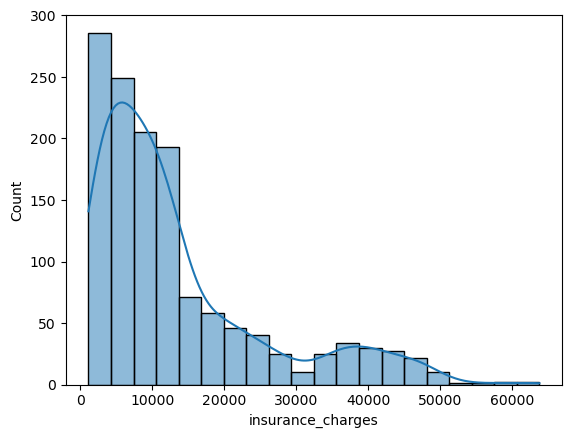

In [24]:
sns.histplot(state_rec['insurance_charges'], bins=20, kde = True) # shows extreme values for 'fat'

In [25]:
# Clean extreme values in 'insurance_charges'
state_rec = state_rec[state_rec['insurance_charges'] < 6000]

<Axes: xlabel='insurance_charges', ylabel='Count'>

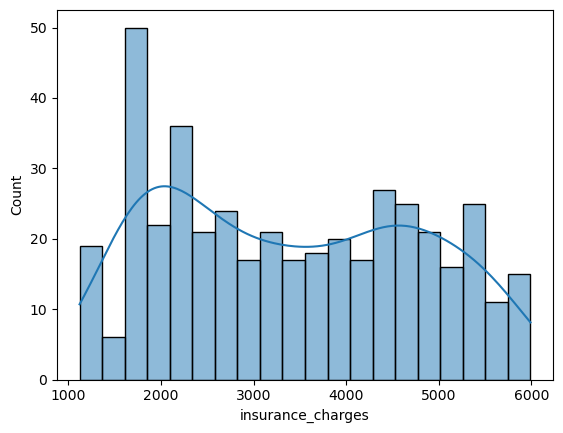

In [26]:
sns.histplot(state_rec['insurance_charges'], bins=20, kde = True)

In [27]:
state_rec.dtypes

age                    int64
sex                   object
bmi                  float64
children               int64
smoker                object
region                object
insurance_charges    float64
dtype: object

In [28]:
df['insurance_charges'].quantile(0.75) - df['insurance_charges'].quantile(0.25)

11911.37345

In [29]:
#check statistics
state_rec.describe()

,age,bmi,children,insurance_charges
count,428.000000,428.000000,428.000000,428.000000
mean,26.065421,30.034019,0.810748,3397.096636
std,6.329768,6.222449,1.083915,1389.310765
min,18.000000,15.960000,0.000000,1121.873900
25%,20.000000,25.786250,0.000000,2147.369425
50%,25.500000,29.860000,0.000000,3286.199200
75%,31.000000,34.100000,1.000000,4565.996850
max,42.000000,53.130000,5.000000,5989.523650


## Plotting Choropleth

In [30]:
#switch region name to match JSON file
df['region'] = df['region'].str.title()

In [31]:
insurance_geo['region'] = insurance_geo['region'].str.title()

In [32]:
df['region']

0       Southwest
1       Southeast
2       Southeast
3       Northwest
4       Northwest
          ...    
1332    Northwest
1333    Northeast
1334    Southeast
1335    Southwest
1336    Northwest
Name: region, Length: 1337, dtype: object

In [33]:
df

,age,sex,bmi,children,smoker,region,insurance_charges
0,19,female,27.900,0,yes,Southwest,16884.92400
1,18,male,33.770,1,no,Southeast,1725.55230
2,28,male,33.000,3,no,Southeast,4449.46200
3,33,male,22.705,0,no,Northwest,21984.47061
4,32,male,28.880,0,no,Northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,Northwest,10600.54830
1333,18,female,31.920,0,no,Northeast,2205.98080
1334,18,female,36.850,0,no,Southeast,1629.83350
1335,21,female,25.800,0,no,Southwest,2007.94500


In [34]:
# Create a data frame Region and Insurance Charges
data_to_plot = df[['region','insurance_charges']]
data_to_plot.head()

,region,insurance_charges
0,Southwest,16884.92400
1,Southeast,1725.55230
2,Southeast,4449.46200
3,Northwest,21984.47061
4,Northwest,3866.85520


In [35]:
#aggregate region and insurance_charges
plot_df = insurance_geo.groupby('region', as_index=False)['insurance_charges'].mean()

In [36]:
# Setup a folium map for mean of insurance_charges
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(
    geo_data = world_geo, 
    data = plot_df,
    columns = ['region', 'insurance_charges'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "charges").add_to(map)
folium.LayerControl().add_to(map)

map

In [37]:
plot_df = insurance_geo.groupby('region', as_index=False)['insurance_charges'].sum()

In [38]:
# Setup a folium map for sum of insurance_charges
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(
    geo_data = world_geo, 
    data = plot_df,
    columns = ['region', 'insurance_charges'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "charges").add_to(map)
folium.LayerControl().add_to(map)

map

In [39]:
#plot choropleth of region & age
plot_df = insurance_geo.groupby('region', as_index=False)['age'].mean()

In [40]:
# Setup a folium map for average age in each region
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(
    geo_data = world_geo, 
    data = plot_df,
    columns = ['region', 'age'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "years").add_to(map)
folium.LayerControl().add_to(map)

map

In [41]:
#sum age in each region
plot_df = insurance_geo.groupby('region', as_index=False)['age'].sum()

In [42]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(
    geo_data = world_geo, 
    data = plot_df,
    columns = ['region', 'age'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "years").add_to(map)
folium.LayerControl().add_to(map)

map

In [43]:
#plot bmi per region
plot_df = insurance_geo.groupby('region', as_index=False)['bmi'].mean()

In [44]:
# Setup a folium map of average bmi per region
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(
    geo_data = world_geo, 
    data = plot_df,
    columns = ['region', 'bmi'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "body mass index").add_to(map)
folium.LayerControl().add_to(map)

map

## Does the analysis answer any research questions 

## The area with the most insurance charges is the Southeast
## The mean body mass index it highest in the Southeast. 
## Both of these do support my hypothesis that the higher someone's bmi is, the higher their insurance charges are
## The sum of age in a region seems to have the strongest relationship to insurance charges compared to any other variable in this insurance dataset. 

## Additional Questions

## How much of an influence does age have on one's insurance charges compared to bmi and smoking?
## What is causing the Southwest to have lower insurance charges especially since they have the highest average aged population?
## How strong of an influence does bmi have on one's insurance charges? The Northeast has lower bmi but higher insurance charges compared with the Southwest. 
## Does a person's gender have any effect on increasing or decreasing insurance charges?